# Big Data (UBA) -  2024

## Trabajo Práctico 1 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 25 de octubre a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo m.n.romero91@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [17]:
# Importamos los módulos necesarios
import requests
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Configuramos la búsqueda
buscar = "sommier king"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))


# Se hace el get a la API (pedido) y se recibe una respuesta (response)
response = requests.request("GET", url)
print(response) # correcto

<Response [200]>


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [18]:
# Se convierte la respuesta obtenida en JSON
data = response.json() 
data

# Se extraen los productos que están en el 'results'
productos = data['results']

# Se crea un DataFrame seleccionando sólo algunos elementos de la respuesta
df = pd.DataFrame(productos)[['title', 'condition', 'permalink', 'price', 'original_price']]

# Mostramos las primeras filas del DataFrame
print(df.head())
print(df.head(10))

                                               title condition  \
0  Colchon Espuma Alta Densidad Elite King 2,00 X...       new   
1  Colchon Resortes King Size Doble Pillow Top 2 ...       new   
2  Colchon King Size Espuma Alta Densidad 2 X 180...       new   
3  Colchón Y Sommier Espuma Alta Densidad 200x200...       new   
4  Colchon King Size Espuma Alta Densidad 2 X 2 D...       new   

                                           permalink      price  \
0  https://www.mercadolibre.com.ar/colchon-espuma...  344719.00   
1  https://articulo.mercadolibre.com.ar/MLA-61952...  481009.00   
2  https://www.mercadolibre.com.ar/colchon-king-s...  399349.00   
3  https://articulo.mercadolibre.com.ar/MLA-91197...  688629.89   
4  https://articulo.mercadolibre.com.ar/MLA-61951...  522159.00   

   original_price  
0        491579.0  
1        685929.0  
2        569479.0  
3        983757.0  
4       1167149.0  
                                               title condition  \
0  Colchon Esp

In [19]:
# Se calcula el precio promedio, el mínimo y el máximo

# Precio promedio
precio_promedio = df['price'].mean()

# Precio mínimo
precio_minimo = df['price'].min()

# Precio máximo
precio_maximo = df['price'].max()


# Imprimimos los resultados
print(f"Precio promedio: {precio_promedio}")
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")

Precio promedio: 895750.1403333334
Precio mínimo: 344719.0
Precio máximo: 1915675.0


In [20]:
# Sumamos también el producto con una mayor diferencia entre precio original y precio actual

# En primer lugar creamos la columna necesaria de diferencia_precio 
df['diferencia_precio'] = df['original_price'] - df['price']

# Encontrar el producto con la mayor diferencia
producto_mayor_diferencia = df.loc[df['diferencia_precio'].idxmax()]

# Imprimimos el producto con la mayor diferencia de precio
print(producto_mayor_diferencia)


title                Colchon King Size Espuma Alta Densidad 2 X 2 D...
condition                                                          new
permalink            https://articulo.mercadolibre.com.ar/MLA-61951...
price                                                         522159.0
original_price                                               1167149.0
diferencia_precio                                             644990.0
Name: 4, dtype: object


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

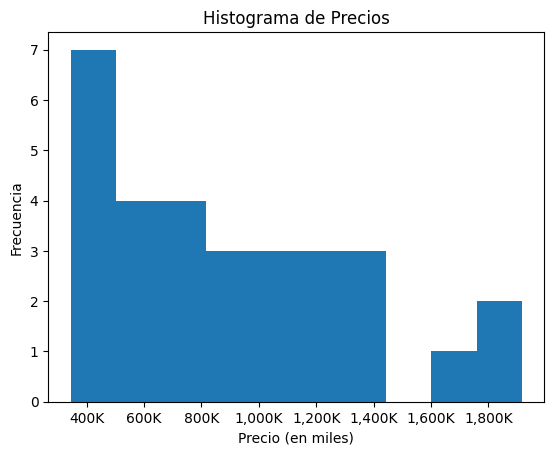

In [23]:
# Creamos un histograma con los precios

# Crear el histograma de la columna 'precio'
ax = df['price'].hist(bins=10)

# Personalizar el eje X para mostrar los valores en miles
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1000) + 'K'))
ax.grid(False)

# Agregar etiquetas y título
plt.xlabel('Precio (en miles)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el gráfico
plt.show()


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [ ]:
# Resolver acá


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
